## Observations and Insights 

In [359]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import pylab as pl
import sklearn
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_df =pd.merge(mouse_metadata,study_results, on="Mouse ID")


# Display the data table for preview

mouse_df = mouse_df.sort_values(["Mouse ID","Timepoint"], ascending = [True,True])
mouse_df = mouse_df.reset_index()


mouse_df



,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,454,a203,Infubinol,Female,20,23,0,45.000000,0
1,455,a203,Infubinol,Female,20,23,5,48.508468,0
2,456,a203,Infubinol,Female,20,23,10,51.852437,1
3,457,a203,Infubinol,Female,20,23,15,52.777870,1
4,458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1888,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [360]:
# Checking the number of mice from original data.
number_of_mice_original = mouse_df.count()
number_of_mice_original

index                 1893
Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [361]:
# Finding how many pairs of unique mouse ID  and how many Timepoints per each mouse
mouse_df["Mouse ID"].value_counts()

g989    13
s185    10
x581    10
a411    10
c302    10
        ..
o848     1
t573     1
h428     1
b447     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [362]:
# View data only ID# g989
only_g989 = mouse_df.loc[mouse_df["Mouse ID"] == "g989", :]
sorted_only_g989 = only_g989.sort_values(["Timepoint"], ascending = [True]) 
sorted_only_g989

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,908,g989,Propriva,Female,21,26,0,45.000000,0
587,909,g989,Propriva,Female,21,26,0,45.000000,0
588,910,g989,Propriva,Female,21,26,5,48.786801,0
589,911,g989,Propriva,Female,21,26,5,47.570392,0
590,912,g989,Propriva,Female,21,26,10,51.745156,0
591,913,g989,Propriva,Female,21,26,10,49.880528,0
592,914,g989,Propriva,Female,21,26,15,51.325852,1
593,915,g989,Propriva,Female,21,26,15,53.442020,0
594,916,g989,Propriva,Female,21,26,20,55.326122,1
595,917,g989,Propriva,Female,21,26,20,54.657650,1


In [363]:
# check types of variable
mouse_df.dtypes


index                   int64
Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [364]:
# Change "Tumor Volume (mm3)" from float64 to interger
mouse_df['Tumor Volume (mm3)'] = mouse_df['Tumor Volume (mm3)'].astype('int')
mouse_df.dtypes


index                  int64
Mouse ID              object
Drug Regimen          object
Sex                   object
Age_months             int64
Weight (g)             int64
Timepoint              int64
Tumor Volume (mm3)     int32
Metastatic Sites       int64
dtype: object

In [365]:

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#cleaned_mouse_df = mouse_df.drop_duplicates(subset="Mouse ID", keep = "first")

#cleaned_mouse_df

cleaned_mouse_df = mouse_df.drop_duplicates(subset="Mouse ID", keep = "last")
cleaned_mouse_df = cleaned_mouse_df.sort_values(["Mouse ID","Timepoint"], ascending = [True, True]) 

del cleaned_mouse_df["index"]

cleaned_mouse_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,a203,Infubinol,Female,20,23,45,67,2
19,a251,Infubinol,Female,21,25,45,65,1
29,a262,Placebo,Female,17,29,45,70,4
39,a275,Ceftamin,Female,20,28,45,62,3
46,a366,Stelasyn,Female,16,29,30,63,1
...,...,...,...,...,...,...,...,...
1852,z435,Propriva,Female,12,26,10,48,0
1862,z578,Ramicane,Male,11,16,45,30,0
1872,z581,Infubinol,Female,24,25,45,62,3
1882,z795,Naftisol,Female,13,29,45,65,3


In [366]:
cleaned_mouse_df["Mouse ID"].value_counts()

s185    1
x822    1
b879    1
s141    1
o725    1
       ..
u327    1
h246    1
a699    1
v409    1
k894    1
Name: Mouse ID, Length: 249, dtype: int64

In [367]:
only_g989 = cleaned_mouse_df.loc[cleaned_mouse_df["Mouse ID"] == "g989", :]
print(only_g989)
sorted_only_g989 = only_g989.sort_values(["Timepoint"], ascending = [True]) 
sorted_only_g989

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
598     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
598                  62                 2  


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
598,g989,Propriva,Female,21,26,35,62,2


In [368]:
# Checking number of mice after removing duplicates
cleaned_mouse_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,12.730924,26.116466,32.911647,54.554217,1.682731
std,7.228687,3.697003,15.465109,12.615837,1.325823
min,1.000000,15.000000,0.000000,22.000000,0.000000
25%,6.000000,25.000000,20.000000,45.000000,1.000000
50%,13.000000,27.000000,45.000000,55.000000,1.000000
75%,19.000000,29.000000,45.000000,64.000000,3.000000
max,24.000000,30.000000,45.000000,78.000000,4.000000


In [369]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_ID = mouse_df["Mouse ID"].duplicated() 
  
# displaying data 

mouse_df[duplicate_mouse_ID]


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,455,a203,Infubinol,Female,20,23,5,48,0
2,456,a203,Infubinol,Female,20,23,10,51,1
3,457,a203,Infubinol,Female,20,23,15,52,1
4,458,a203,Infubinol,Female,20,23,20,55,1
5,459,a203,Infubinol,Female,20,23,25,56,1
...,...,...,...,...,...,...,...,...,...
1888,1888,z969,Naftisol,Male,9,30,25,63,2
1889,1889,z969,Naftisol,Male,9,30,30,65,3
1890,1890,z969,Naftisol,Male,9,30,35,69,4
1891,1891,z969,Naftisol,Male,9,30,40,70,4


In [370]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [371]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
    #and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [372]:
# create a group by object based on "Drug Regimen"

grouped_by_drug = cleaned_mouse_df.groupby(["Drug Regimen"])

grouped_by_drug.count()


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,25,25,25,25,25,25,25
Ceftamin,25,25,25,25,25,25,25
Infubinol,25,25,25,25,25,25,25
Ketapril,25,25,25,25,25,25,25
Naftisol,25,25,25,25,25,25,25
Placebo,25,25,25,25,25,25,25
Propriva,25,25,25,25,25,25,25
Ramicane,25,25,25,25,25,25,25
Stelasyn,24,24,24,24,24,24,24


In [373]:
tumor_volume_mm3_mean = grouped_by_drug ["Tumor Volume (mm3)"].mean()

tumor_volume_mm3_mean

#grouped_by_drug.mean()


Drug Regimen
Capomulin    36.160000
Ceftamin     57.200000
Infubinol    57.760000
Ketapril     62.360000
Naftisol     60.800000
Placebo      60.120000
Propriva     56.320000
Ramicane     35.800000
Stelasyn     60.583333
Zoniferol    58.680000
Name: Tumor Volume (mm3), dtype: float64

In [374]:
tumor_volume_mm3_median = grouped_by_drug ["Tumor Volume (mm3)"].median()
tumor_volume_mm3_median
#grouped_by_drug.median()

Drug Regimen
Capomulin    38.0
Ceftamin     59.0
Infubinol    60.0
Ketapril     64.0
Naftisol     63.0
Placebo      62.0
Propriva     55.0
Ramicane     36.0
Stelasyn     61.5
Zoniferol    61.0
Name: Tumor Volume (mm3), dtype: float64

In [375]:
tumor_volume_mm3_var = grouped_by_drug ["Tumor Volume (mm3)"].var()
tumor_volume_mm3_var
#grouped_by_drug.var()

Drug Regimen
Capomulin     31.723333
Ceftamin      67.750000
Infubinol     73.190000
Ketapril      96.740000
Naftisol     102.500000
Placebo       79.110000
Propriva      67.976667
Ramicane      32.250000
Stelasyn      90.688406
Zoniferol     75.976667
Name: Tumor Volume (mm3), dtype: float64

In [376]:
tumor_volume_mm3_std = grouped_by_drug ["Tumor Volume (mm3)"].std()
tumor_volume_mm3_std
#grouped_by_drug.std()

Drug Regimen
Capomulin     5.632347
Ceftamin      8.231039
Infubinol     8.555115
Ketapril      9.835649
Naftisol     10.124228
Placebo       8.894380
Propriva      8.244796
Ramicane      5.678908
Stelasyn      9.523046
Zoniferol     8.716460
Name: Tumor Volume (mm3), dtype: float64

In [377]:
tumor_volume_mm3_sem = grouped_by_drug ["Tumor Volume (mm3)"].sem()
tumor_volume_mm3_sem
#grouped_by_drug.sem()

Drug Regimen
Capomulin    1.126469
Ceftamin     1.646208
Infubinol    1.711023
Ketapril     1.967130
Naftisol     2.024846
Placebo      1.778876
Propriva     1.648959
Ramicane     1.135782
Stelasyn     1.943884
Zoniferol    1.743292
Name: Tumor Volume (mm3), dtype: float64

In [378]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_by_drug_regimen = pd.DataFrame({"Tumor Volume (mm3) Mean":tumor_volume_mm3_mean,
                                                   "Tumor Volume (mm3) Median":tumor_volume_mm3_median,
                                                   "Tumor Volume (mm3) Variance":tumor_volume_mm3_var,
                                                   "Tumor Volume (mm3) Standard deviation":tumor_volume_mm3_std,
                                                   "Tumor Volume (mm3) Standard SEM":tumor_volume_mm3_sem})


summary_statistics_by_drug_regimen


,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard deviation,Tumor Volume (mm3) Standard SEM
Drug Regimen,,,,,
Capomulin,36.160000,38.0,31.723333,5.632347,1.126469
Ceftamin,57.200000,59.0,67.750000,8.231039,1.646208
Infubinol,57.760000,60.0,73.190000,8.555115,1.711023
Ketapril,62.360000,64.0,96.740000,9.835649,1.967130
Naftisol,60.800000,63.0,102.500000,10.124228,2.024846
Placebo,60.120000,62.0,79.110000,8.894380,1.778876
Propriva,56.320000,55.0,67.976667,8.244796,1.648959
Ramicane,35.800000,36.0,32.250000,5.678908,1.135782
Stelasyn,60.583333,61.5,90.688406,9.523046,1.943884


## Bar and Pie Charts

In [379]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
cleaned_mouse_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,a203,Infubinol,Female,20,23,45,67,2
19,a251,Infubinol,Female,21,25,45,65,1
29,a262,Placebo,Female,17,29,45,70,4
39,a275,Ceftamin,Female,20,28,45,62,3
46,a366,Stelasyn,Female,16,29,30,63,1
...,...,...,...,...,...,...,...,...
1852,z435,Propriva,Female,12,26,10,48,0
1862,z578,Ramicane,Male,11,16,45,30,0
1872,z581,Infubinol,Female,24,25,45,62,3
1882,z795,Naftisol,Female,13,29,45,65,3


In [380]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

unique_mice_tested  = grouped_by_drug['Drug Regimen'].count()
unique_mice_tested

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Drug Regimen, dtype: int64

In [381]:
counts  = mouse_df['Drug Regimen'].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [382]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
unique_mice_tested_df = pd.DataFrame({"unique mice tested": unique_mice_tested})

unique_mice_tested_df


,unique mice tested
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


In [383]:
counts_df = pd.DataFrame({"mice counts": counts})

counts_df

,mice counts
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


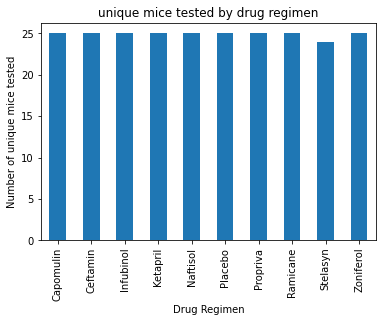

<Figure size 432x288 with 0 Axes>

In [384]:
#option1: unique mice
unique_mice_tested_chart = unique_mice_tested.plot(kind="bar", title="unique mice tested by drug regimen")
unique_mice_tested_chart.set_xlabel("Drug Regimen")
unique_mice_tested_chart.set_ylabel("Number of unique mice tested")

plt.show()
plt.tight_layout()

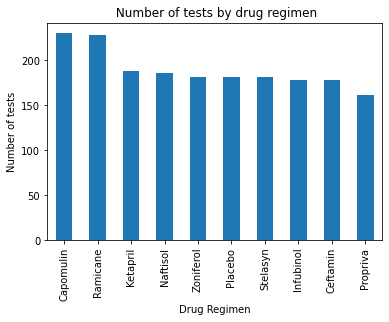

<Figure size 432x288 with 0 Axes>

In [385]:
#Option2 : 
counts_chart = counts.plot(kind="bar", title=" Number of tests by drug regimen")
counts_chart.set_xlabel("Drug Regimen")
counts_chart.set_ylabel("Number of tests")

plt.show()
plt.tight_layout()

([<matplotlib.axis.XTick at 0x16ce9282730>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

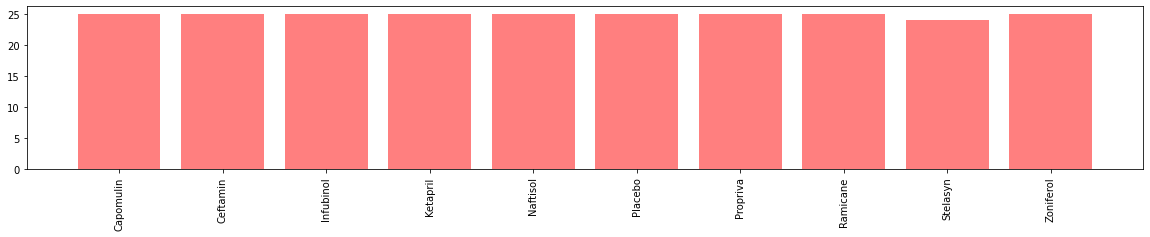

In [386]:
##Option1: Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Set x axis and tick locations
drugs = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(len(unique_mice_tested_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
#plt.bar(x_axis,unique_mice_tested_df, color='r', alpha=0.5, align="center")
plt.bar(x_axis,unique_mice_tested_df["unique mice tested"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, grouped_by_drug["Drug Regimen"], rotation="vertical")

plt.xticks(tick_locations, drugs, rotation="vertical")

([<matplotlib.axis.XTick at 0x16cebb1f190>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

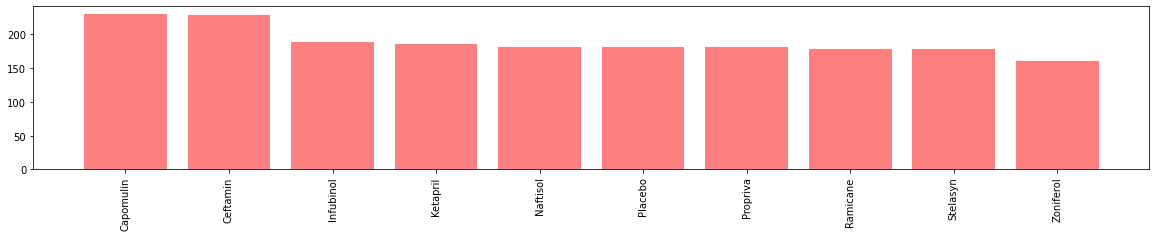

In [387]:
##Option 2 : Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Set x axis and tick locations
drugs = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(len(counts_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
#plt.bar(x_axis,unique_mice_tested_df, color='r', alpha=0.5, align="center")
plt.bar(x_axis,counts_df["mice counts"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, grouped_by_drug["Drug Regimen"], rotation="vertical")

plt.xticks(tick_locations, drugs, rotation="vertical")

In [388]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# gropu
grouped_by_sex = cleaned_mouse_df.groupby(["Sex"])
grouped_by_sex.count()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,124,124,124,124,124,124,124
Male,125,125,125,125,125,125,125


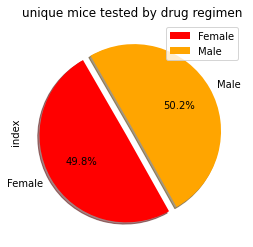

In [389]:
## Generate a pie plot showing the distribution of female versus male mice using pandas


# Create a new variable that holds the count of Female and Male groups
count_it_up = grouped_by_sex.count()
count_it_up.head(12)
explode = (0.1, 0)

mice_pie = count_it_up.plot(kind="pie",y='Mouse ID', title=("unique mice tested by drug regimen "),explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
mice_pie.set_ylabel("index")

plt.show()


In [390]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [124, 125]

# The colors of each section of the pie chart
colors = ["red", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x16ce9995dc0>,
 [Text(-0.7771287477781476, -0.9143691319028482, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.4533251028705861, -0.5333819936099948, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

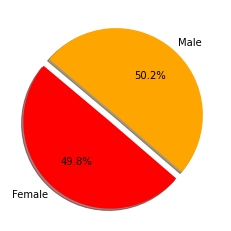

In [391]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [392]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [393]:
# Start by getting the last (greatest) timepoint for each mouse


last_timepoint_cleaned_mouse_df = cleaned_mouse_df.sort_values(["Mouse ID", "Timepoint"],ascending = [False, False])
last_timepoint_cleaned_mouse_df = cleaned_mouse_df.drop_duplicates(subset='Mouse ID', keep='last')


last_timepoint_cleaned_mouse_df





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,a203,Infubinol,Female,20,23,45,67,2
19,a251,Infubinol,Female,21,25,45,65,1
29,a262,Placebo,Female,17,29,45,70,4
39,a275,Ceftamin,Female,20,28,45,62,3
46,a366,Stelasyn,Female,16,29,30,63,1
...,...,...,...,...,...,...,...,...
1852,z435,Propriva,Female,12,26,10,48,0
1862,z578,Ramicane,Male,11,16,45,30,0
1872,z581,Infubinol,Female,24,25,45,62,3
1882,z795,Naftisol,Female,13,29,45,65,3


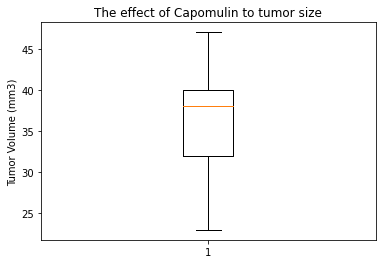

In [394]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
only_capomulins = last_timepoint_cleaned_mouse_df.loc[last_timepoint_cleaned_mouse_df["Drug Regimen"] == "Capomulin", :]
(only_capomulins["Tumor Volume (mm3)"]).describe()
capomulin = only_capomulins["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('The effect of Capomulin to tumor size')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin)
plt.show()

In [395]:
capomulin.describe()

count    25.000000
mean     36.160000
std       5.632347
min      23.000000
25%      32.000000
50%      38.000000
75%      40.000000
max      47.000000
Name: Tumor Volume (mm3), dtype: float64

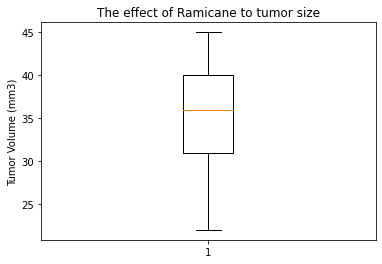

In [396]:
only_ramicanes = last_timepoint_cleaned_mouse_df.loc[last_timepoint_cleaned_mouse_df["Drug Regimen"] == "Ramicane", :]
(only_ramicanes["Tumor Volume (mm3)"]).describe()
ramicane = only_ramicanes["Tumor Volume (mm3)"]

fig2, ax2 = plt.subplots()
ax2.set_title('The effect of Ramicane to tumor size')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(ramicane)
plt.show()


In [397]:
ramicane.describe()

count    25.000000
mean     35.800000
std       5.678908
min      22.000000
25%      31.000000
50%      36.000000
75%      40.000000
max      45.000000
Name: Tumor Volume (mm3), dtype: float64

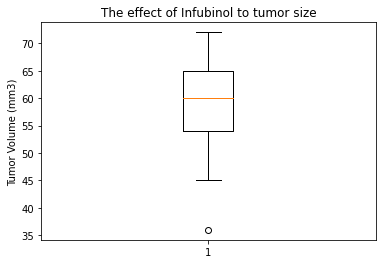

In [424]:
only_infubinols = last_timepoint_cleaned_mouse_df.loc[last_timepoint_cleaned_mouse_df["Drug Regimen"] == "Infubinol", :]
(only_infubinols["Tumor Volume (mm3)"]).describe()
infubinol = only_infubinols["Tumor Volume (mm3)"]

fig2, ax2 = plt.subplots()
ax2.set_title('The effect of Infubinol to tumor size')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(ramicane)
plt.show()

In [399]:
infubinol.describe()

count    25.000000
mean     57.760000
std       8.555115
min      36.000000
25%      54.000000
50%      60.000000
75%      65.000000
max      72.000000
Name: Tumor Volume (mm3), dtype: float64

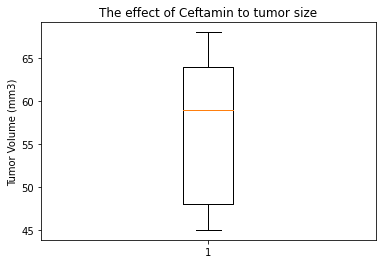

In [400]:
only_ceftamins = last_timepoint_cleaned_mouse_df.loc[last_timepoint_cleaned_mouse_df["Drug Regimen"] == "Ceftamin", :]
(only_ceftamins["Tumor Volume (mm3)"]).describe()
ceftamin = only_ceftamins["Tumor Volume (mm3)"]

fig2, ax2 = plt.subplots()
ax2.set_title('The effect of Ceftamin to tumor size')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(ceftamin)
plt.show()

In [401]:
ceftamin.describe()

count    25.000000
mean     57.200000
std       8.231039
min      45.000000
25%      48.000000
50%      59.000000
75%      64.000000
max      68.000000
Name: Tumor Volume (mm3), dtype: float64

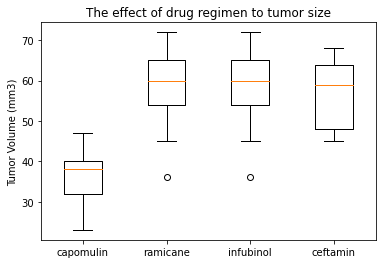

In [402]:

#plot tumor data from 4 drug regimen together on the same charge
data = [capomulin,ramicane,infubinol, ceftamin]
##labeling
fig5, ax5 = plt.subplots()
ax5.set_title('The effect of drug regimen to tumor size')
ax5.set_ylabel('Tumor Volume (mm3)')
ax5.boxplot(data)
plt.xticks([1, 2, 3,4], ['capomulin', 'ramicane', 'infubinol','ceftamin'])
plt.show()



In [403]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_types = mouse_df["Drug Regimen"].unique()
treatments = treatment_types.tolist()
treatments


# Create empty list to fill with tumor vol data (for plotting)

#tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ramicane',
 'Ketapril',
 'Propriva',
 'Naftisol',
 'Capomulin']

In [404]:
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
tumor_vol_data

#tumor_vol_data = []
#for x in treatments:
   # tumor_vol_data.append(x * x + np.random.randint(0, np.ceil(max(x_axis))))

[]

In [405]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [422]:
# capomulin-IQR-potential outliers
capomulin_quartiles = capomulin.quantile([.25,.5,.75])
lowerq = capomulin_quartiles[0.25]
upperq = capomulin_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol_data is: {lowerq}")
print(f"The upper quartile of tumor_vol_data is: {upperq}")
print(f"The interquartile range of tumor_vol_data is: {iqr}")
print(f"The the median of tumor_vol_data is: {capomulin_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor_vol_data is: 32.0
The upper quartile of tumor_vol_data is: 40.0
The interquartile range of tumor_vol_data is: 8.0
The the median of tumor_vol_data is: 38.0 
Values below 20.0 could be outliers.
Values above 52.0 could be outliers.


In [423]:
# ramicane-IQR-potential outliers
ramicane_quartiles = ramicane.quantile([.25,.5,.75])
lowerq = ramicane_quartiles[0.25]
upperq = ramicane_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol_data is: {lowerq}")
print(f"The upper quartile of tumor_vol_data is: {upperq}")
print(f"The interquartile range of tumor_vol_data is: {iqr}")
print(f"The the median of tumor_vol_data is: {ramicane_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor_vol_data is: 54.0
The upper quartile of tumor_vol_data is: 65.0
The interquartile range of tumor_vol_data is: 11.0
The the median of tumor_vol_data is: 60.0 
Values below 37.5 could be outliers.
Values above 81.5 could be outliers.


In [425]:
# infubinol-IQR-potential outliers
infubinol_quartiles = infubinol.quantile([.25,.5,.75])
lowerq = infubinol_quartiles[0.25]
upperq = infubinol_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol_data is: {lowerq}")
print(f"The upper quartile of tumor_vol_data is: {upperq}")
print(f"The interquartile range of tumor_vol_data is: {iqr}")
print(f"The the median of tumor_vol_data is: {infubinol_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor_vol_data is: 54.0
The upper quartile of tumor_vol_data is: 65.0
The interquartile range of tumor_vol_data is: 11.0
The the median of tumor_vol_data is: 60.0 
Values below 37.5 could be outliers.
Values above 81.5 could be outliers.


In [426]:
# ceftamin-IQR-potential outliers
ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = ceftamin_quartiles[0.25]
upperq = ceftamin_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol_data is: {lowerq}")
print(f"The upper quartile of tumor_vol_data is: {upperq}")
print(f"The interquartile range of tumor_vol_data is: {iqr}")
print(f"The the median of tumor_vol_data is: {ceftamin_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor_vol_data is: 48.0
The upper quartile of tumor_vol_data is: 64.0
The interquartile range of tumor_vol_data is: 16.0
The the median of tumor_vol_data is: 59.0 
Values below 24.0 could be outliers.
Values above 88.0 could be outliers.


In [427]:
# Placebo-IQR-potential outliers
only_placebos = last_timepoint_cleaned_mouse_df.loc[last_timepoint_cleaned_mouse_df["Drug Regimen"] == "Placebo", :]
(only_placebos["Tumor Volume (mm3)"]).describe()
placebo = only_placebos["Tumor Volume (mm3)"]

placebo_quartiles = placebo.quantile([.25,.5,.75])
lowerq = placebo_quartiles[0.25]
upperq = placebo_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol_data is: {lowerq}")
print(f"The upper quartile of tumor_vol_data is: {upperq}")
print(f"The interquartile range of tumor_vol_data is: {iqr}")
print(f"The the median of tumor_vol_data is: {placebo_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor_vol_data is: 52.0
The upper quartile of tumor_vol_data is: 68.0
The interquartile range of tumor_vol_data is: 16.0
The the median of tumor_vol_data is: 62.0 
Values below 28.0 could be outliers.
Values above 92.0 could be outliers.


In [ ]:
# Stelasyn-IQR-potential outliers
only_stelasyns = last_timepoint_cleaned_mouse_df.loc[last_timepoint_cleaned_mouse_df["Drug Regimen"] == "Stelasyn", :]
(only_stelasyns["Tumor Volume (mm3)"]).describe()
stelasyn = only_stelasyns["Tumor Volume (mm3)"]

stelasyn_quartiles = stelasyn.quantile([.25,.5,.75])
lowerq = stelasyn_quartiles[0.25]
upperq = stelasyn_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol_data is: {lowerq}")
print(f"The upper quartile of tumor_vol_data is: {upperq}")
print(f"The interquartile range of tumor_vol_data is: {iqr}")
print(f"The the median of tumor_vol_data is: {stelasyn_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [433]:
# Zoniferol-IQR-potential outliers
only_zoniferols = last_timepoint_cleaned_mouse_df.loc[last_timepoint_cleaned_mouse_df["Drug Regimen"] == "Zoniferol", :]
(only_zoniferols["Tumor Volume (mm3)"]).describe()
zoniferol = only_zoniferols["Tumor Volume (mm3)"]

zoniferol_quartiles = zoniferol.quantile([.25,.5,.75])
lowerq = zoniferol_quartiles[0.25]
upperq = zoniferol_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol_data is: {lowerq}")
print(f"The upper quartile of tumor_vol_data is: {upperq}")
print(f"The interquartile range of tumor_vol_data is: {iqr}")
print(f"The the median of tumor_vol_data is: {zoniferol_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor_vol_data is: 49.0
The upper quartile of tumor_vol_data is: 66.0
The interquartile range of tumor_vol_data is: 17.0
The the median of tumor_vol_data is: 61.0 
Values below 23.5 could be outliers.
Values above 91.5 could be outliers.


In [432]:
# Ketapril-IQR-potential outliers
only_ketaprils = last_timepoint_cleaned_mouse_df.loc[last_timepoint_cleaned_mouse_df["Drug Regimen"] == "Ketapril", :]
(only_ketaprils["Tumor Volume (mm3)"]).describe()
ketapril = only_ketaprils["Tumor Volume (mm3)"]

ketapril_quartiles = ketapril.quantile([.25,.5,.75])
lowerq = ketapril_quartiles[0.25]
upperq = ketapril_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol_data is: {lowerq}")
print(f"The upper quartile of tumor_vol_data is: {upperq}")
print(f"The interquartile range of tumor_vol_data is: {iqr}")
print(f"The the median of tumor_vol_data is: {ketapril_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor_vol_data is: 56.0
The upper quartile of tumor_vol_data is: 69.0
The interquartile range of tumor_vol_data is: 13.0
The the median of tumor_vol_data is: 64.0 
Values below 36.5 could be outliers.
Values above 88.5 could be outliers.


In [430]:
# Propriva-IQR-potential outliers
only_proprivas = last_timepoint_cleaned_mouse_df.loc[last_timepoint_cleaned_mouse_df["Drug Regimen"] == "Propriva", :]
(only_proprivas["Tumor Volume (mm3)"]).describe()
propriva = only_proprivas["Tumor Volume (mm3)"]

propriva_quartiles = propriva.quantile([.25,.5,.75])
lowerq = propriva_quartiles[0.25]
upperq = propriva_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol_data is: {lowerq}")
print(f"The upper quartile of tumor_vol_data is: {upperq}")
print(f"The interquartile range of tumor_vol_data is: {iqr}")
print(f"The the median of tumor_vol_data is: {propriva_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor_vol_data is: 49.0
The upper quartile of tumor_vol_data is: 62.0
The interquartile range of tumor_vol_data is: 13.0
The the median of tumor_vol_data is: 55.0 
Values below 29.5 could be outliers.
Values above 81.5 could be outliers.


In [429]:
# Naftisol-IQR-potential outliers
only_naftisols = last_timepoint_cleaned_mouse_df.loc[last_timepoint_cleaned_mouse_df["Drug Regimen"] == "Naftisol", :]
(only_naftisols["Tumor Volume (mm3)"]).describe()
naftisol = only_naftisols["Tumor Volume (mm3)"]

naftisol_quartiles = naftisol.quantile([.25,.5,.75])
lowerq = naftisol_quartiles[0.25]
upperq = naftisol_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol_data is: {lowerq}")
print(f"The upper quartile of tumor_vol_data is: {upperq}")
print(f"The interquartile range of tumor_vol_data is: {iqr}")
print(f"The the median of tumor_vol_data is: {naftisol_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor_vol_data is: 52.0
The upper quartile of tumor_vol_data is: 69.0
The interquartile range of tumor_vol_data is: 17.0
The the median of tumor_vol_data is: 63.0 
Values below 26.5 could be outliers.
Values above 94.5 could be outliers.


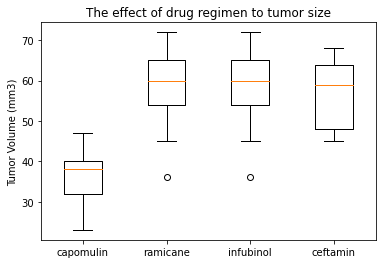

In [420]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#plot tumor data from 4 drug regimen together on the same charge
data = [capomulin,ramicane,infubinol, ceftamin]
##labeling
fig5, ax5 = plt.subplots()
ax5.set_title('The effect of drug regimen to tumor size')
ax5.set_ylabel('Tumor Volume (mm3)')
ax5.boxplot(data)
plt.xticks([1, 2, 3,4], ['capomulin', 'ramicane', 'infubinol','ceftamin'])
plt.show()


## Line and Scatter Plots

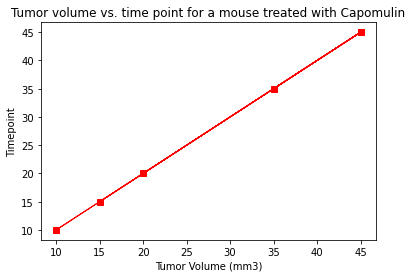

In [407]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
only_capomulins

x_axis = only_capomulins["Tumor Volume (mm3)"]
y_axis = only_capomulins["Timepoint"]

plt.title("Tumor volume vs. time point for a mouse treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")

plt.plot(X_axis, y_axis,  marker="s", color="Red", linewidth=1, label="Capomulin" )
plt.show()

In [408]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
only_capomulins

#grouped_by_drug = cleaned_mouse_df.groupby(["Drug Regimen"])
capomulin_data_groupby_id = only_capomulins.groupby(["Mouse ID"])
capomulin_data_groupby_id_mean = capomulin_data_groupby_id.mean()
capomulin_data_groupby_id_mean
#df.rename(columns={"A": "a", "B": "c"})
#capomulin_data_groupby_id_mean.rename(columns={"Age_months": "Average Age_months", "Weight (g)": "Average Weight (g)",
                                              # "Timepoint": "Average Timepoint", "Tumor Volume (mm3)": "Average Tumor Volume (mm3)",
                                              # "Metastatic Sites": "Average Metastatic Sites", })

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9,22,45,38,2
b742,7,21,45,38,0
f966,16,17,20,30,0
g288,3,19,45,37,1
g316,22,22,45,40,2
i557,1,24,45,47,1
i738,23,20,45,37,2
j119,7,23,45,38,1
j246,21,21,35,38,1


In [409]:
capomulin_data_groupby_id_mean_rename = capomulin_data_groupby_id_mean.rename(columns={"Age_months": "Average Age_months", "Weight (g)": "Average Weight (g)",
                                               "Timepoint": "Average Timepoint", "Tumor Volume (mm3)": "Average Tumor Volume (mm3)",
                                               "Metastatic Sites": "Average Metastatic Sites", })
capomulin_data_groupby_id_mean_rename

,Average Age_months,Average Weight (g),Average Timepoint,Average Tumor Volume (mm3),Average Metastatic Sites
Mouse ID,,,,,
b128,9,22,45,38,2
b742,7,21,45,38,0
f966,16,17,20,30,0
g288,3,19,45,37,1
g316,22,22,45,40,2
i557,1,24,45,47,1
i738,23,20,45,37,2
j119,7,23,45,38,1
j246,21,21,35,38,1


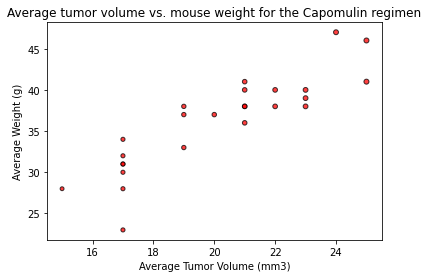

In [410]:

x_axis = capomulin_data_groupby_id_mean_rename["Average Weight (g)"]
y_axis = capomulin_data_groupby_id_mean_rename["Average Tumor Volume (mm3)"]

plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Average Weight (g)")

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
           s=x_axis, alpha=0.75, label="Capomulin" )
plt.show()

## Correlation and Regression

In [411]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The r-squared is: 0.7699611324619476


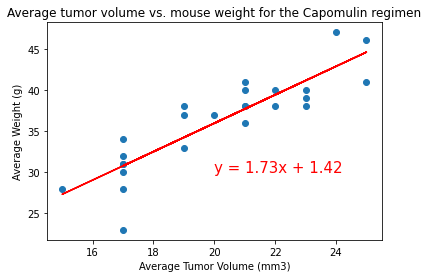

In [419]:
#y = mx + c
x_axis = capomulin_data_groupby_id_mean_rename["Average Weight (g)"]
y_axis = capomulin_data_groupby_id_mean_rename["Average Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regress_values = x_axis * slope + intercept


plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(20,30),fontsize=15,color="red")


plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Average Weight (g)")

print(f"The r-squared is: {rvalue**2}")
plt.show()